## Description:
> 使用鸢尾花数据集演示如何将决策树的结果可视化
>
> 需要的软件 graphviz,但是graphviz依赖xcode的一些库，所以先安装xcode

In [2]:
# 导入用到的包
import pandas as pd
from matplotlib.image import imread
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import pydotplus
import os

In [3]:
# 导入数据
filename = 'iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(filename, names=names)
array = dataset.values
X = array[:, 0:4]
y = array[:, 4]

In [4]:
# 分离数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.2)

In [6]:
# 决策树模型训练
model = DecisionTreeClassifier()
model.fit(X=X_train, y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

There is no file to be deleted


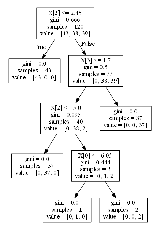

In [7]:
# 决策树图形化
dot_data = export_graphviz(model, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
path = os.getcwd() + '/'        # os.getcwd() 返回当前绝对路径,返回类型为str
tree_file = path + 'iris_tree.png'
try:
    os.remove(tree_file)
except:
    print('There is no file to be deleted')
finally:
    graph.write(tree_file, format='png')

# 显示图像
image_data = imread(tree_file)
plt.imshow(image_data)
plt.axis('off')
plt.show()

In [8]:
# 评估算法
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9
